In [2]:
import pandas as pd # pandas dataframe library
import numpy as np #mathmatical library will use in large array, linear algebra
from matplotlib import pyplot as plt#data visual library

In [3]:
df = pd.read_excel("Height-Width.xlsx")
x = df[['Height']]
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [4]:
y = df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.3 ,random_state=5)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [7]:
m = reg.coef_

In [16]:
m

array([6.00809929])

In [8]:
c = reg.intercept_
c

-227.77595602223423

In [9]:
reg.predict(xtest) #y er man berh kora

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [10]:
pred = reg.predict(xtest)
pred

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [11]:
df["Predicted Result"] = reg.predict(x) # new col store

In [12]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(ytest,pred)
mse

102.60138482843213

In [14]:
mae = mean_absolute_error(ytest,pred)
mae

8.061150778858023

# Best Fit Line

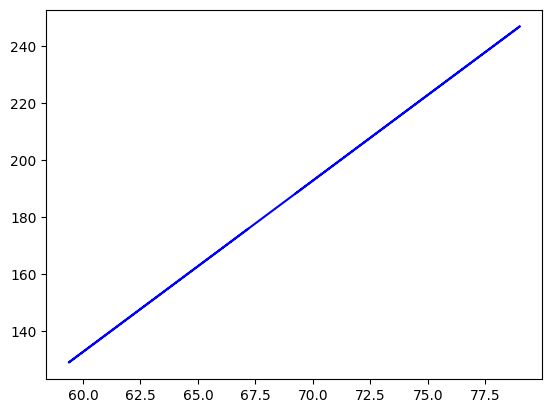

In [15]:
plt.plot(xtrain,reg.predict(xtrain),color="blue")

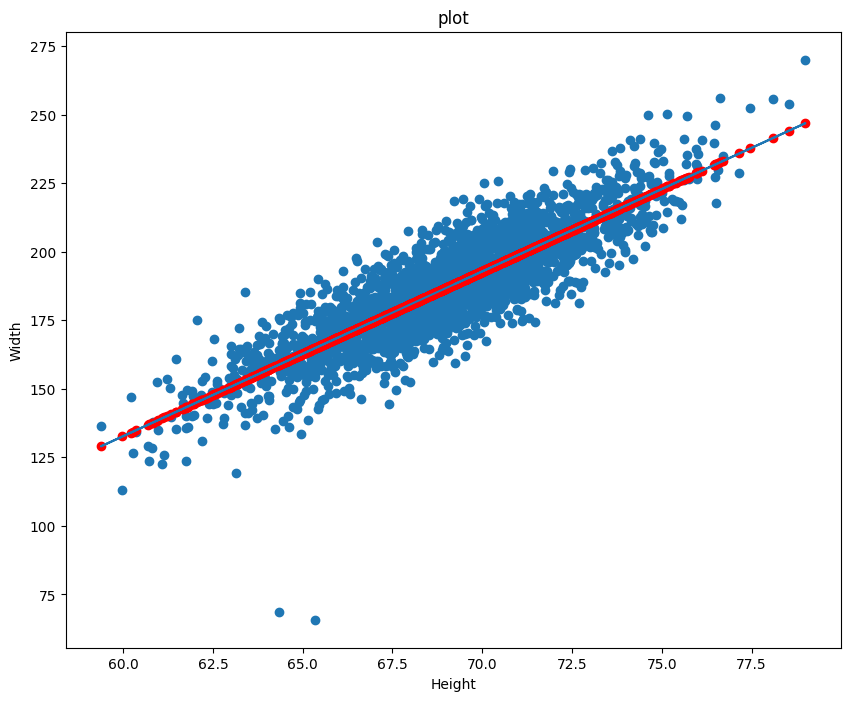

In [20]:
plt.figure(figsize = (10,8))
plt.xlabel("Height")
plt.ylabel("Width")
plt.title("plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")

In [22]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7302328605746943

In [23]:
xtest.to_csv("xtest.csv")

In [24]:
xtest.head()

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587


In [25]:
len(xtest)

1051

# Save Model

In [26]:
import pickle as pk
import joblib as jb

In [28]:
pk.dump(reg,open("Height-Width2","wb")) #model save

In [29]:
reg2 = pk.load(open("Height-Width2","rb")) # model load

In [32]:
reg2.predict([[1300]])

C:\Users\rabey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7582.75311459])

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
jb.dump(reg,"Second")

['Second']